In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Any results you write to the current directory are saved as output.


In [ ]:
import warnings

warnings.filterwarnings('ignore')

# **Import dataset** <a class="anchor" id="7"></a>

In [ ]:
data = 'pulsar_data.csv'

df = pd.read_csv(data)

# ** Exploratory data analysis** <a class="anchor" id="8"></a>



Now, I will explore the data to gain insights about the data.

In [ ]:
# view dimensions of dataset

df.shape

(17898, 9)

We can see that there are 17898 instances and 9 variables in the data set.

In [ ]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.


Now, I will view the column names to check for leading and trailing spaces.

In [ ]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [ ]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

I have removed the leading spaces from the column names. Let's again view the column names to confirm the same.

In [ ]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

In [ ]:
# rename column names ليه بغير اسماء الاعمده

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [ ]:
df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

We can see that the column names are shortened. IP stands for `integrated profile` and DM-SNR stands for `delta modulation and signal to noise ratio`. Now, it is much more easy to work with the columns.

Our target variable is the `target_class` column. So, I will check its distribution.

In [ ]:
# check distribution of target_class column

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [ ]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

We can see that percentage of observations of the class label `0` and `1` is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


We can see that there are no missing values in the dataset and all the variables are numerical variables.

### Explore missing values in variables

In [ ]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

We can see that there are no missing values in the dataset.

# **Declare feature vector and target variable** <a class="anchor" id="9"></a>

In [ ]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']


In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64


# **Split data into separate training and test set** <a class="anchor" id="10"></a>


In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# **Feature Scaling** <a class="anchor" id="11"></a>


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# **Run SVM with default hyperparameters** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


### Run SVM with rbf kernel and C=100.0


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers.
So, I will run SVM with kernel=`rbf` and C=100.0.

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

### Run SVM with rbf kernel and C=1000.0


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In this case, we can see that the accuracy had decreased with C=1000.0

# **13. Run SVM with linear kernel** <a class="anchor" id="13"></a>



### Run SVM with linear kernel and C=1.0

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9830


### Run SVM with linear kernel and C=100.0

In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


### Run SVM with linear kernel and C=1000.0

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


We can see that the training set and test-set accuracy are very much comparable.

### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting.


### Compare model accuracy with null accuracy


So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

# New Section

In [ ]:
# check class distribution in test set

y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

We can see that the occurences of most frequent class `0` is 3306. So, we can calculate null accuracy by dividing 3306 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


We can see that our model accuracy score is 0.9830 but null accuracy score is 0.9235. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

# ** Run SVM with polynomial kernel** <a class="anchor" id="14"></a>



### Run SVM with polynomial kernel and C=1.0

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9807


 ### Run SVM with polynomial kernel and C=100.0

In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


Polynomial kernel gives poor performance. It may be overfitting the training set.

# **Confusion matrix** <a class="anchor" id="16"></a>


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


The confusion matrix shows `3289 + 230 = 3519 correct predictions` and `17 + 44 = 61 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 3289


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 230


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 17 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 44 `(Type II error)`

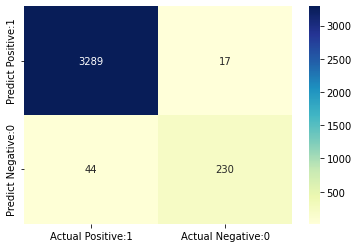

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')